In [1]:
import numpy as np 

from oracle import simulator_moslb
from moslb import moslb

In [2]:
m = 3 # number of objectives
d = 5 # number of context's dimension
K = 5 * d # number of arms at each round

In [3]:
env = simulator_moslb(num_obj=m,num_dim=d,vary_context=0)
env.reset()

In [4]:
alg = moslb(num_dim=d, num_obj=m)
alg.reset()

In [5]:
T = 1000
R = 0 
R_his = [0]

for t in range(T): 
    X = env.observe_context(num_arms=20, verbose=1)
    a_t = alg.take_action(X, alpha=.1)

    r_t = env.get_reward(X[a_t])
    reg_t = env.regret(X[a_t])
    alg.update_params(arm=X[a_t], reward=r_t)

    R += reg_t
    R_his.append(R)
    print('Round: {:d}, regret: {:.4f}'.format(t, R))

{'#arms': 20,
 '#dimension': 5,
 '#objective': 3,
 '#optimal arms': 11,
 'Regret for each arm': array([[0.0706415 ],
       [0.        ],
       [0.02209593],
       [0.0254171 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00516933],
       [0.        ],
       [0.02631306],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.04000656],
       [0.01499437],
       [0.        ],
       [0.        ],
       [0.06826594],
       [0.04861701]])}
Round: 0, regret: 0.0706
Round: 1, regret: 0.0706
Round: 2, regret: 0.0706
Round: 3, regret: 0.0706
Round: 4, regret: 0.0856
Round: 5, regret: 0.0856
Round: 6, regret: 0.0856
Round: 7, regret: 0.1539
Round: 8, regret: 0.1539
Round: 9, regret: 0.1539
Round: 10, regret: 0.1539
Round: 11, regret: 0.1539
Round: 12, regret: 0.1539
Round: 13, regret: 0.1539
Round: 14, regret: 0.1539
Round: 15, regret: 0.1539
Round: 16, regret: 0.1539
Round: 17, regret: 0.1539
Round: 18, regret: 0.153

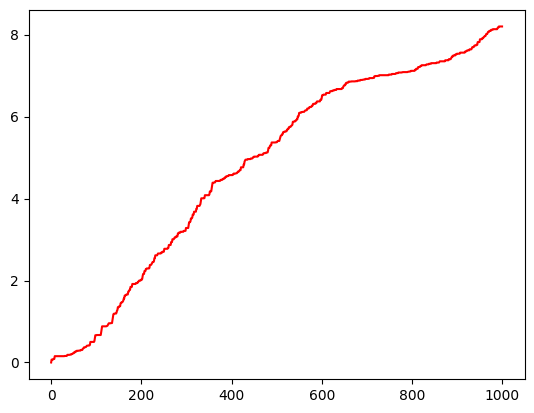

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(T+1), R_his, color='r', linestyle='-', label="P-UCB")

## Example for MOSLB-PL
Running with five objectives under MPL-PL order $\{\{0,1,2\},\{3,4\}\}$.

In [7]:
from oracle import simulator_moslb_pl
from moslb import moslb_pl

In [8]:
pl = [[0,1,2],[3,4]]

In [9]:
env = simulator_moslb_pl(num_dim=d,priority_level=pl,vary_context=0)

In [10]:
alg = moslb_pl(num_dim=d, priority_level=pl)

In [11]:
T = 1000
R = np.zeros((len(pl),))
epsilon = 5 * d**(2/3) * (T)**(-1/3)

env.reset()
alg.reset()

for t in range(T): 
    X = env.observe_context(num_arms=K, verbose=0)
    a_t = alg.take_action(X, epsilon=epsilon, alpha=1)
    print(alg.estimate_uncertainty(X[0]))

    r_t = env.get_reward(X[a_t])
    reg_t = env.regret(X[a_t])
    alg.update_params(arm=X[a_t], reward=r_t)

    R += reg_t
    print('Round: {:d}, regret: {}'.format(t, R))

5.740901148588211
Round: 0, regret: [0.07992537 0.        ]
5.921377467907606
Round: 1, regret: [0.11149939 0.        ]
5.784571607496384
Round: 2, regret: [0.19142476 0.        ]
5.866675528984007
Round: 3, regret: [0.19142476 0.        ]
5.384156469955013
Round: 4, regret: [0.19142476 0.38124926]
5.31652709882317
Round: 5, regret: [0.19142476 0.76249853]
5.3099431334348495
Round: 6, regret: [0.19142476 1.3649308 ]
5.335133732619161
Round: 7, regret: [0.19142476 1.68525485]
5.363000207117853
Round: 8, regret: [0.19142476 1.71132403]
5.045299762939613
Round: 9, regret: [0.19142476 2.0925733 ]
5.060768713975898
Round: 10, regret: [0.20597854 2.0925733 ]
5.041411273374719
Round: 11, regret: [0.28590391 2.0925733 ]
5.063513004053504
Round: 12, regret: [0.28590391 2.23979552]
5.021426750236427
Round: 13, regret: [0.29611648 2.23979552]
4.117410203513005
Round: 14, regret: [0.29611648 2.84222778]
4.1222157063371245
Round: 15, regret: [0.29611648 3.30966607]
3.989076377930035
Round: 16, regr

## Example for MOSLB-PC
Running with five objectives under MPL-PC relation $\{\{0,1\},\{2,3,4\}\}$.

In [12]:
from oracle import simulator_moslb_pc
from moslb import moslb_pc

In [13]:
pc = [[0,1],[2,3,4]]

In [14]:
env = simulator_moslb_pc(num_dim=d,priority_chain=pc,vary_context=True)
env.reset()

In [15]:
alg = moslb_pc(num_dim=d, priority_chain=pc)

In [16]:
T = 1000
R = np.zeros((env.c_max,))
epsilon = 5 * d**(2/3) * (T)**(-1/3)

env.reset()
alg.reset()

for t in range(T): 
    X = env.observe_context(num_arms=K, verbose=0)
    a_t = alg.take_action(X, epsilon=epsilon, alpha=1)

    r_t = env.get_reward(X[a_t])
    reg_t = env.regret(X[a_t])
    alg.update_params(arm=X[a_t], reward=r_t)

    R += reg_t
    print('Round: {:d}, regret: {}'.format(t, R))

Round: 0, regret: [0.07 0.   0.  ]
Round: 1, regret: [0.08 0.31 0.  ]
Round: 2, regret: [0.08 0.31 0.  ]
Round: 3, regret: [0.31 0.31 0.  ]
Round: 4, regret: [0.34 0.76 0.  ]
Round: 5, regret: [0.64 0.76 0.07]
Round: 6, regret: [0.64 0.76 0.07]
Round: 7, regret: [0.7  0.76 0.37]
Round: 8, regret: [0.88 0.76 0.5 ]
Round: 9, regret: [0.97 0.76 0.5 ]
Round: 10, regret: [1.06 0.92 0.5 ]
Round: 11, regret: [1.06 0.92 0.5 ]
Round: 12, regret: [1.34 1.19 0.5 ]
Round: 13, regret: [1.38 1.6  0.5 ]
Round: 14, regret: [1.38 1.6  0.5 ]
Round: 15, regret: [1.39 1.6  0.5 ]
Round: 16, regret: [1.43 1.6  0.63]
Round: 17, regret: [1.51 1.6  0.77]
Round: 18, regret: [1.59 1.6  0.92]
Round: 19, regret: [1.59 1.6  0.92]
Round: 20, regret: [1.63 1.83 0.92]
Round: 21, regret: [1.63 1.83 0.92]
Round: 22, regret: [1.68 1.83 0.92]
Round: 23, regret: [1.69 2.4  0.92]
Round: 24, regret: [1.7  2.65 0.92]
Round: 25, regret: [1.84 2.65 0.92]
Round: 26, regret: [1.87 2.65 1.09]
Round: 27, regret: [2.   2.65 1.09]
Ro